# Experiment C - Kaggle competition with Polynomial Logistic, Adaboost, and Random forest Classifier model using Grid search

### Thirada Tiamklang 14337188

_1 September 2023_

In this experiment, we will predict the probability of American college players being drafted to join NBA teams' rosters. We will use Polynomial Logistic Regression, Adaboost, and Random forest classifier model with grid search to aid in predicting the target outcome.

__Tabel of contents__

1. Load and explore data
2. Polynomial Logistic Regression model
3. Adaboost classifier model
4. Random Forest classifier model
5. Conclusion
6. Predict prob on Test Dataset

## 1. Load and explore data

In [1]:
import pandas as pd
import numpy as np
from joblib import dump

In [2]:
X_train = pd.read_csv('../data/processed/X_train.csv')
X_val   = pd.read_csv('../data/processed/X_val.csv'  )
X_test  = pd.read_csv('../data/processed/X_test.csv' )
y_train = pd.read_csv('../data/processed/y_train.csv')
y_val   = pd.read_csv('../data/processed/y_val.csv'  )
y_test  = pd.read_csv('../data/processed/y_test.csv' )

In [3]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(35897, 59)
(8975, 59)
(11219, 59)


In [4]:
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(35897, 1)
(8975, 1)
(11219, 1)


In [5]:
# Convert to a 1-dimensional array
y_train = y_train.squeeze() 
y_val = y_val.squeeze() 
y_test = y_test.squeeze() 

In [6]:
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(35897,)
(8975,)
(11219,)


We will select different features from the two previous experiments to determine if there are any more relevant features that could improve the AUROC score. In this case we will use _all the features_ to train the model. The data used for this analysis is the dataset that has already been cleaned and featured of NAs in experiment A.

## 2. Polynomial Logistic Regression model

We will train the Polynomial Logistic Regression model using grid search to determine the hyperparameters.

In [7]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [8]:
poly_logreg_classifier = make_pipeline(
    PolynomialFeatures(degree=2), 
    LogisticRegression(random_state=42)
)

In [9]:
poly_logreg_param_grid = {
    'logisticregression__C': [0.01, 0.1, 1.0, 10.0],
}

In [10]:
poly_logreg_grid_search = GridSearchCV(estimator=poly_logreg_classifier, param_grid=poly_logreg_param_grid,
                                       scoring='roc_auc', cv=5, n_jobs=-1)
poly_logreg_grid_search.fit(X_train, y_train)

/Users/thiradatiamklang/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/thiradatiamklang/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('logisticregression',
                                        LogisticRegression(random_state=42))]),
             n_jobs=-1,
             param_grid={'logisticregression__C': [0.01, 0.1, 1.0, 10.0]},
             scoring='roc_auc')

In [13]:
best_poly_logreg_model = poly_logreg_grid_search.best_estimator_
y_val_pred_proba_poly_logreg = best_poly_logreg_model.predict_proba(X_val)[:, 1]
val_roc_auc_poly_logreg = roc_auc_score(y_val, y_val_pred_proba_poly_logreg)
print("Poly Logistic Regression Validation AUROC Score:", val_roc_auc_poly_logreg)

Poly Logistic Regression Validation AUROC Score: 0.8253925491717045


In [14]:
y_test_pred_proba_poly_logreg = best_poly_logreg_model.predict_proba(X_test)[:, 1]
test_roc_auc_poly_logreg = roc_auc_score(y_test, y_test_pred_proba_poly_logreg)
print("Poly Logistic Regression Test AUROC Score:", test_roc_auc_poly_logreg)

Poly Logistic Regression Test AUROC Score: 0.8768830236107371


In [15]:
print(best_poly_logreg_model)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('logisticregression', LogisticRegression(random_state=42))])


## 3.Adaboost classifier model

In [16]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import roc_auc_score

In [17]:
ada = AdaBoostClassifier(random_state=42)

In [18]:
ada_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0]
}

In [19]:
ada_grid_search = GridSearchCV(estimator=ada, param_grid=ada_param_grid,
                                    scoring='roc_auc', cv=5, n_jobs=-1)
ada_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=42), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 1.0],
                         'n_estimators': [50, 100, 200]},
             scoring='roc_auc')

In [20]:
best_ada = ada_grid_search.best_estimator_
y_val_pred_proba_ada = best_ada.predict_proba(X_val)[:, 1]
val_roc_auc_ada = roc_auc_score(y_val, y_val_pred_proba_ada)
print("AdaBoost Validation AUROC Score:", val_roc_auc_ada)

AdaBoost Validation AUROC Score: 0.984433895439439


In [21]:
y_test_pred_proba_ada = best_ada.predict_proba(X_test)[:, 1]
test_roc_auc_ada = roc_auc_score(y_test, y_test_pred_proba_ada)
print("AdaBoost Test AUROC Score:", test_roc_auc_ada)

AdaBoost Test AUROC Score: 0.9885671963371937


In [22]:
print(ada_grid_search.best_estimator_)

AdaBoostClassifier(learning_rate=0.1, n_estimators=200, random_state=42)


## 4. Random forest classifier model

In [23]:
from sklearn.ensemble import RandomForestClassifier

In [24]:
rf_classifier = RandomForestClassifier(random_state=42)

In [25]:
rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True]
}

In [26]:
rf_grid_search = GridSearchCV(estimator=rf_classifier, param_grid=rf_param_grid,
                           scoring='roc_auc', cv=5, n_jobs=-1)
rf_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [None, 10],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='roc_auc')

In [27]:
best_rf_model = rf_grid_search.best_estimator_
y_val_pred_proba = best_rf_model.predict_proba(X_val)[:, 1]
rf_val_roc_auc = roc_auc_score(y_val, y_val_pred_proba)
print("Validation AUROC Score:", rf_val_roc_auc)

Validation AUROC Score: 0.9832030061567689


In [28]:
y_test_pred_proba = best_rf_model.predict_proba(X_test)[:, 1]
rf_test_roc_auc = roc_auc_score(y_test, y_test_pred_proba)
print("Test AUROC Score:", rf_test_roc_auc)

Test AUROC Score: 0.9866246970105036


In [29]:
print(best_rf_model)

RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=5,
                       random_state=42)


## 5. Conclusion

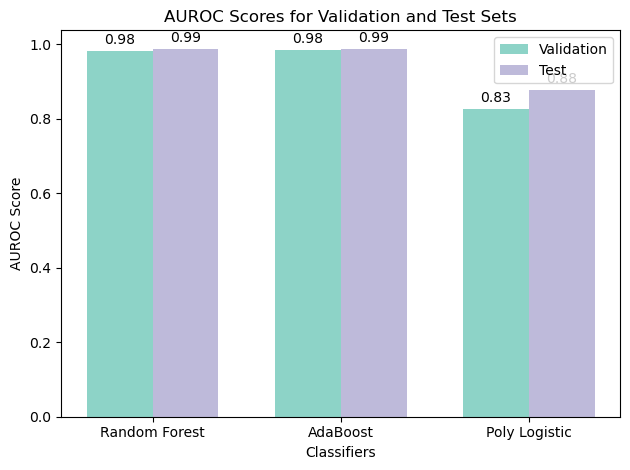

In [30]:
import matplotlib.pyplot as plt

# Classifier names
classifiers = ['Random Forest', 'AdaBoost', 'Poly Logistic']

# AUROC scores for validation and test sets
val_scores = [rf_val_roc_auc, val_roc_auc_ada, val_roc_auc_poly_logreg]
test_scores = [rf_test_roc_auc, test_roc_auc_ada, test_roc_auc_poly_logreg]

# Create a bar plot
fig, ax = plt.subplots()
bar_width = 0.35
index = range(len(classifiers))
pastel_colors = ['#8dd3c7', '#bebada', '#fb8072']

rects1 = ax.bar(index, val_scores, bar_width, label='Validation', color=pastel_colors[0])
rects2 = ax.bar([i + bar_width for i in index], test_scores, bar_width, label='Test', color=pastel_colors[1])

ax.set_xlabel('Classifiers')
ax.set_ylabel('AUROC Score')
ax.set_title('AUROC Scores for Validation and Test Sets')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(classifiers)
ax.legend()

# Add AUROC values on top of the bars
def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}', xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')

add_labels(rects1)
add_labels(rects2)

plt.tight_layout()
plt.show()


It can be observed from the graph above that both the Random Forest and AdaBoost classifiers achieved nearly the same AUROC score of 0.99 on the testing set. However, the __AdaBoost classifier__ slightly outperformed the Random Forest model, achieving a slightly better score of 0.9885671963371937 on the testing set, while the Random Forest achieved a score of 0.9866246970105036.

In this case, we will use __Adaboost classifier with learning_rate=0.1, n_estimators=200, random_state=42__ to predict the probability on test dataset.

In [31]:
dump(best_ada,  '../models/best_adaboost_gird.joblib')

In [34]:
dump(best_ada,  '../src/models/best_adaboost_grid.joblib')

['../src/models/best_adaboost_grid.joblib']

## 6. Predict prob on Test Dataset

In [ ]:
test = pd.read_csv('../data/processed/features_test.csv')

In [ ]:
raw_test = pd.read_csv('../data/raw/test.csv')

In [ ]:
test.shape

In [ ]:
# Use trained models to predict probability on Dataset test
drafted_probability_poly = best_ada.predict_proba(test)[:, 1]

In [ ]:
results_C = pd.DataFrame({'drafted': drafted_probability_poly})

In [ ]:
results_C['player_id'] = raw_test['player_id']
results_C = results_C[['player_id', 'drafted']]
print(results_C)

In [ ]:
results_C.to_csv('../data/processed/results_C.csv', index=False)

## Reference

So, A. (2023). _36120_AdvMLA-Lab2_Exercise3-Solutions.ipynb_. https://colab.research.google.com/drive/1LzgqM0bRDNL9hf0GiE2t2xCzpamOvwAJ?authuser=1#scrollTo=bQ530dp0MJJQ